In [1]:
import tensorflow as tf
print(tf.__version__)


2.12.0


<center><h1>Phishing e-mails detection using deep learning</h1></center>

![image.png](attachment:image.png)

In [3]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import os

In [4]:
import pandas as pd
from google.colab import files

# Upload the CSV files
uploaded_files = files.upload()

# Create an empty DataFrame to hold the data
df0 = pd.DataFrame()

# Loop through each uploaded file and append it to the DataFrame
for file_name in uploaded_files.keys():
    data = pd.read_csv(file_name)
    df0 = df0.append(data)



Saving phishing0.mbox.csv to phishing0.mbox.csv
Saving phishing1.mbox.csv to phishing1.mbox.csv
Saving phishing2.mbox.csv to phishing2.mbox.csv
Saving phishing3.mbox.csv to phishing3.mbox.csv
Saving phishing4.mbox.csv to phishing4.mbox.csv
Saving phishing-2018.mbox.csv to phishing-2018.mbox.csv
Saving phishing-2019.mbox.csv to phishing-2019.mbox.csv
Saving phishing-2020.mbox.csv to phishing-2020.mbox.csv
Saving phishing-2021.mbox.csv to phishing-2021.mbox.csv
Saving phishing-2015.mbox.csv to phishing-2015.mbox.csv
Saving phishing-2016.mbox.csv to phishing-2016.mbox.csv
Saving phishing-2017.mbox.csv to phishing-2017.mbox.csv


In [5]:
df_phish=df0.copy()
#df_phish=pd.DataFrame()
# Select the columns you want to keep
df_phish = df0[['from', 'subject', 'content']]
# Add a new column "class" with a value of 1
df_phish['class'] = 1

df_phish.tail(4)

,from,subject,content,class
1,NaN,You Have (1) Urgent Message From USAA Bank. Ac...,td>\n\n\n\n\n\n\n\n\n\n\n\nSecurity Preference...,1
2,NaN,Re: Important Notification,"Dear Customer,\nTo learn how USAA protects you...",1
3,NaN,RE: HELP CENTER!,NaN,1
4,NaN,Account Notification,"Dear Customer,\n\n\n\nWe emailed you a little ...",1


In [6]:
df0.shape

(4290, 9)

In [7]:
df_phish.dropna(inplace=True)

In [8]:
df_phish.shape

(3377, 4)

In [10]:
!pip install dnspython


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 19.5 MB/s eta 0:00:00


In [11]:
import re
import dns.resolver
import email.utils

# Define a function to check if an email address is valid and exists
def is_valid_email(email_address):
    # Use the parseaddr() function to extract the email address from the string
    address = email.utils.parseaddr(email_address)[1]

    # Use regular expressions to validate the format of the email address
    if not re.match(r"[^@]+@[^@]+\.[^@]+", address):
        return 0

    # Use dnspython to check if the domain in the email address exists and has MX records
    try:
        domain = address.split('@')[1]
        answers = dns.resolver.query(domain, 'MX',lifetime=120)
        return 1
    except (dns.resolver.NoAnswer, dns.resolver.NXDOMAIN, dns.resolver.NoNameservers, dns.exception.Timeout):
        return 0

# Example usage
email_address = 'emna@gmail.com'
if is_valid_email(email_address):
    print('Valid email address')
else:
    print('Invalid email address')


Valid email address


# sender

In [12]:
df_phish['sender_validity'] = df_phish['from'].apply(lambda x: is_valid_email(x))

In [43]:
df_phish.head()

,from,subject,content,class,sender_validity
0,aw-confirm@ebay.com,Billing Issues,Dear valued\neBay member:\n\nWe recently have ...,1,1
1,info@info-mrktng.com,Homeland Security Co AIMT signs Critical U.S. ...,"HTML PUBLIC ""-//W3C//DTD HTML 4.01 Transitiona...",1,0
2,ebay@reply3.ebay.com,Shop the easy way! Find something for everyone...,eBay --> http://click3.ebay.com/705443.53897.0...,1,1
3,exchange-robot@paypal.com,Confirmation,"html PUBLIC ""-//W3C//DTD HTML 4.01 Transitiona...",1,1
4,aw-confirm@ebay.com,WARNING-IFRAME-Your account at eBay has been s...,"HTML PUBLIC ""-//W3C//DTD HTML 4.0 Transitional...",1,1


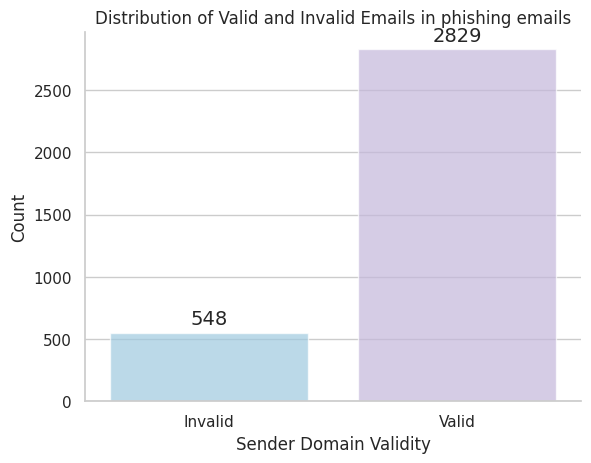

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette to translucent cloudy blue and iris
colors = ["#93CCEA", "#C3B1E1"]

# Create the plot with translucent bars
sns.set(style="whitegrid")
sns.set_palette(sns.color_palette(colors, n_colors=2))
ax = sns.countplot(x="sender_validity", data=df_phish, alpha=0.7)

# Modify the x-axis labels
ax.set_xticklabels(["Invalid", "Valid"])

# Add labels and title
plt.title("Distribution of Valid and Invalid Emails in phishing emails")
plt.xlabel("Sender Domain Validity")
plt.ylabel("Count")

# Add annotations with the counts
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 10), textcoords="offset points", fontsize=14)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

## Non Phishing Data

In [15]:
# Upload the CSV files
uploaded_files2 = files.upload()

# Create an empty DataFrame to hold the data
df1 = pd.DataFrame()

# Loop through each uploaded file and append it to the DataFrame
for file_name in uploaded_files2.keys():
    data1 = pd.read_csv(file_name)
    df1 = df1.append(data1)
# Select the columns you want to keep
df_ham = df1[['from', 'subject', 'content']]
# Add a new column "class" with a value of 1
df_ham['class'] = 0
df_ham['sender_validity'] = 1
df_ham=df_ham.dropna()
df_ham.tail(4)

Saving enron_3_5000.mbox.csv to enron_3_5000.mbox.csv
Saving enron_7_5000.mbox.csv to enron_7_5000.mbox.csv
Saving enron_1_5000.mbox.csv to enron_1_5000.mbox.csv
Saving enron_2_5000.mbox.csv to enron_2_5000.mbox.csv
Saving enron_0_5000.mbox.csv to enron_0_5000.mbox.csv


,from,subject,content,class,sender_validity
4996,dana.davis@enron.com,Industrial Sector,Brad this file is also located in the O: drive...,0,1
4997,dana.davis@enron.com,Re: Calendar,---------------------- Forwarded by Dana Davis...,0,1
4998,dana.davis@enron.com,Re:,---------------------- Forwarded by Dana Davis...,0,1
4999,dana.davis@enron.com,Resume for Sr. Clerk or Amin I Position,"Rhonna, \nAttached is a copy of my resume alo...",0,1


In [16]:
df_ham.isna().sum()

from               0
subject            0
content            0
class              0
sender_validity    0
dtype: int64

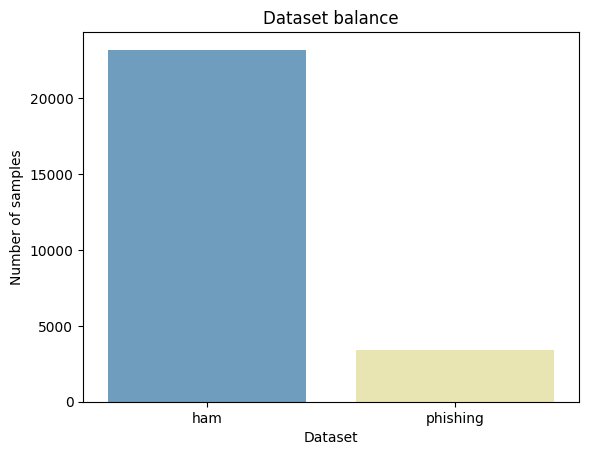

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the colors to use for each dataset
colors = ['#1f77b4', '#EEE685']

# Count the number of samples in each dataset
counts = [len(df_ham), len(df_phish)]

# Create a bar plot
sns.barplot(x=['ham', 'phishing'], y=counts, palette=colors, alpha=0.7)

# Add labels and title
plt.xlabel('Dataset')
plt.ylabel('Number of samples')
plt.title('Dataset balance')

# Show the plot
plt.show()


In [50]:
df_phish.shape

(3377, 5)

In [22]:
from sklearn.utils import shuffle
df_ham = df_ham.iloc[:3379]
# concatenate df_phish and df_ham into one DataFrame
data = pd.concat([df_phish, df_ham], ignore_index=True)
data=shuffle(data,random_state=42)
data = data.drop('from', axis=1)
data.head(3)


,subject,content,class,sender_validity
6381,ENA Executive Offsite - May 3 & 4 @ Columbia L...,Since the meeting begins at 8:00 AM on Wednesd...,0,1
1916,Action Required - Your Account Has Been Limited !,PayPal - Limited Account Access Details\n\n\n#...,1,1
469,PayPal Flagged Account,Security Center\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,1,1


In [55]:
data.shape

(6756, 4)

## Email body

## Text input preprocessing

In [30]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [28]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



def clean_text(text):
    """
    Cleans text input for deep learning model by removing html tags, special characters,
    numbers, stop words, and applying lemmatization.
    
    Parameters:
    text (str): Text input to clean.
    
    Returns:
    cleaned_text (str): Cleaned text output.
    """
    
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    
    # Remove special characters and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text.lower())
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Apply lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into cleaned text
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


In [31]:
data['content'] = data['content'].apply(lambda x: clean_text(x))

In [32]:
data['content'][102]

'dear paypal member account randomly flagged system part routine security measure must ensure access use paypal account ensure safe paypal experience require flagged account verify information file u verify information time please visit secure server webform clicking hyperlink click verify information thank using paypal paypal team please reply email mail sent address answered assistance log paypal account choose help link footer page receive email notification plain text instead html update preference paypal email id pp protect account info make sure never provide password fraudulent website safely securely access paypal website account open new web browser eg internet explorer netscape type paypal url httpwwwpaypalcom paypal never ask enter password email information protecting fraud please review security tip httpwwwpaypalcomsecuritytips'

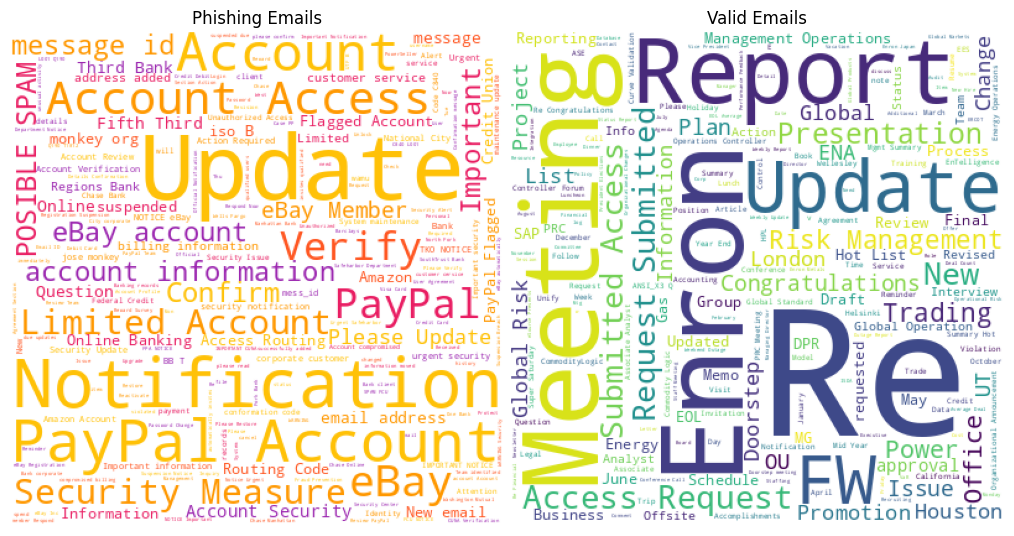

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import colors

# Define a warm color palette
warm_palette = colors.ListedColormap(['#FFC107', '#FF9800', '#FF5722', '#E91E63', '#9C27B0'])

# Generate word cloud for phishing emails with warm color palette
text_phishing = ' '.join(data[data['class'] == 1]['subject'].values)
wordcloud_phishing = WordCloud(width=400, height=400, background_color='white', colormap=warm_palette).generate(text_phishing)

# Generate word cloud for valid emails
text_valid = ' '.join(data[data['class'] == 0]['subject'].values)
wordcloud_valid = WordCloud(width=400, height=400, background_color='white').generate(text_valid)

# Plot the word clouds side by side
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Plot the word cloud for phishing emails on the first axis
axes[0].imshow(wordcloud_phishing)
axes[0].axis("off")
axes[0].set_title("Phishing Emails")

# Plot the word cloud for valid emails on the second axis
axes[1].imshow(wordcloud_valid)
axes[1].axis("off")
axes[1].set_title("Valid Emails")

plt.tight_layout(pad=0)
plt.show()


In [34]:
data['subject'] = data['subject'].apply(lambda x: clean_text(x))

In [36]:
data.columns

Index(['subject', 'content', 'class', 'sender_validity'], dtype='object')

In [ ]:
# Merge the 'subject' and 'content' columns into a new 'text' column
data['text'] = data['subject'] + ' ' + data['content']

# Drop the original 'subject' and 'content' columns
data.drop(['subject', 'content'], axis=1, inplace=True)



In [39]:
data = data[['text', 'sender_validity', 'class']]

In [40]:
data.head(4)

,text,sender_validity,class
6381,ena executive offsite may columbia lake since ...,1,0
1916,action required account limited paypal limited...,1,1
469,paypal flagged account security center begin m...,1,1
5887,new net work cost center determined st memo di...,1,0


In [41]:
data.to_csv('trialdata.csv', index=False)


In [43]:
data.dtypes

text               object
sender_validity     int64
class               int64
dtype: object

# **cnn model**

In [45]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


Epoch 1/10
85/85 [==============================] - 9s 82ms/step - loss: 0.3243 - accuracy: 0.8514 - val_loss: 0.0627 - val_accuracy: 0.9830
Epoch 2/10
85/85 [==============================] - 5s 61ms/step - loss: 0.0390 - accuracy: 0.9907 - val_loss: 0.0225 - val_accuracy: 0.9963
Epoch 3/10
85/85 [==============================] - 7s 79ms/step - loss: 0.0139 - accuracy: 0.9965 - val_loss: 0.0180 - val_accuracy: 0.9956
Epoch 4/10
85/85 [==============================] - 5s 59ms/step - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.0193 - val_accuracy: 0.9956
Epoch 5/10
85/85 [==============================] - 7s 81ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.0217 - val_accuracy: 0.9956
Epoch 6/10
85/85 [==============================] - 5s 64ms/step - loss: 0.0033 - accuracy: 0.9987 - val_loss: 0.0226 - val_accuracy: 0.9941
Epoch 7/10
85/85 [==============================] - 7s 81ms/step - loss: 0.0025 - accuracy: 0.9989 - val_loss: 0.0238 - val_accuracy: 0.9941
Epoch 8/10
85

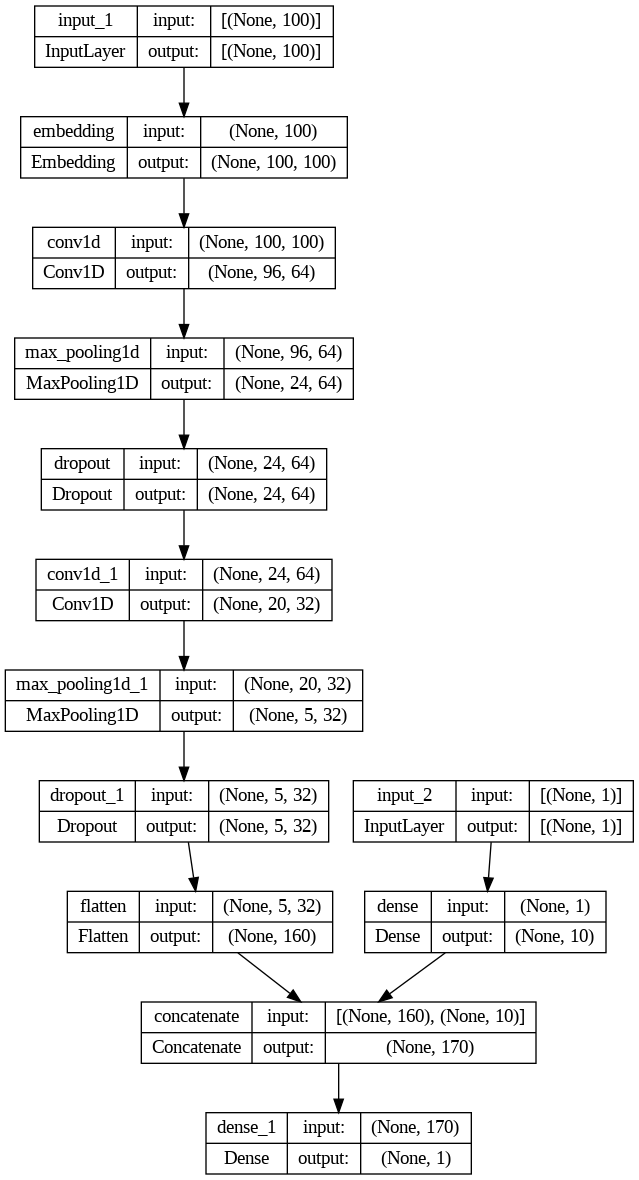

In [47]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.preprocessing.text import Tokenizer

from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Concatenate
from keras.models import Model
from keras.utils import plot_model


# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(data['class'])

# Split the data into training and testing sets
X_text_train, X_text_test, X_sender_train, X_sender_test, y_train, y_test = train_test_split(
    data['text'], data['sender_validity'], y, test_size=0.2, random_state=42)

# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_text_train)

# Convert the text to sequences
maxlen = 100
X_text_train = tokenizer.texts_to_sequences(X_text_train)
X_text_test = tokenizer.texts_to_sequences(X_text_test)

# Pad the sequences
X_text_train = pad_sequences(X_text_train, padding='post', maxlen=maxlen)
X_text_test = pad_sequences(X_text_test, padding='post', maxlen=maxlen)

# Scale the sender_validity feature
scaler = MinMaxScaler()
X_sender_train = scaler.fit_transform(X_sender_train.values.reshape(-1, 1))
X_sender_test = scaler.transform(X_sender_test.values.reshape(-1, 1))

# Define the CNN model
input_text = Input(shape=(maxlen,))
embedding_layer = Embedding(5000, 100, input_length=maxlen)(input_text)
conv1 = Conv1D(64, 5, activation='relu')(embedding_layer)
pool1 = MaxPooling1D(pool_size=4)(conv1)
drop1 = Dropout(0.2)(pool1)
conv2 = Conv1D(32, 5, activation='relu')(drop1)
pool2 = MaxPooling1D(pool_size=4)(conv2)
drop2 = Dropout(0.2)(pool2)
flat = Flatten()(drop2)
input_sender = Input(shape=(1,))
dense1 = Dense(10, activation='relu')(input_sender)
concat = Concatenate()([flat, dense1])
output = Dense(1, activation='sigmoid')(concat)
model = Model(inputs=[input_text, input_sender], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit([X_text_train, X_sender_train], y_train, validation_data=([X_text_test, X_sender_test], y_test), epochs=10, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate([X_text_test, X_sender_test], y_test, verbose=0)
print('Accuracy: %.2f%%' % (accuracy*100))

# Visualize the model
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     500000      ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 96, 64)       32064       ['embedding[0][0]']              
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 24, 64)       0           ['conv1d[0][0]']                 
                                                                                              

In [48]:
# Evaluate the model
loss, accuracy = model.evaluate([X_text_test, X_sender_test], y_test, verbose=0)
print('Accuracy: %.2f%%' % (accuracy*100))


Accuracy: 99.19%


In [49]:
from sklearn.metrics import confusion_matrix

# Get the predicted labels of the test data
y_pred = model.predict([X_text_test, X_sender_test]).round()

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


43/43 [==============================] - 1s 14ms/step
[[663   8]
 [  3 678]]


43/43 [==============================] - 1s 15ms/step


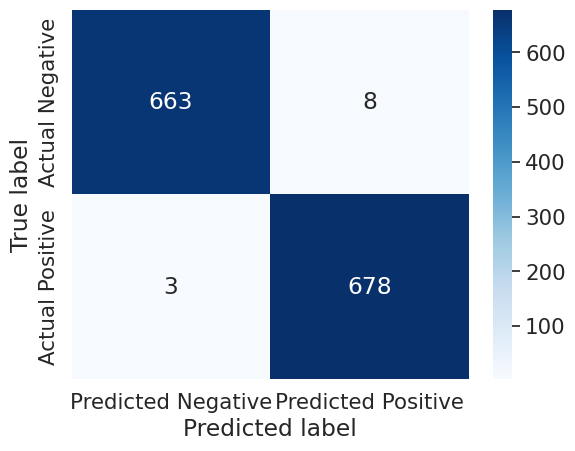

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the predicted labels of the test data
y_pred = model.predict([X_text_test, X_sender_test]).round()

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.set(font_scale=1.4) # Adjust the font size
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [52]:
model.save('cnnmodel.h5')


In other words, the model correctly identified 663 non-phishing emails as non-phishing (true negatives), correctly identified 678 phishing emails as phishing (true positives), incorrectly identified 8 non-phishing emails as phishing (false positives), and incorrectly identified 3 phishing emails as non-phishing (false negatives).

# **LSTM**


In [53]:

from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential

# Load the data


# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['text'])

# Convert the text to sequences
maxlen = 100
X_train = tokenizer.texts_to_sequences(train_data['text'])
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
y_train = train_data['class']

X_test = tokenizer.texts_to_sequences(test_data['text'])
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
y_test = test_data['class']

# Define the model
model1 = Sequential()
model1.add(Embedding(5000, 100, input_length=maxlen))
model1.add(LSTM(64))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

# Evaluate the model
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f%%' % (accuracy*100))


Epoch 1/10
85/85 [==============================] - 15s 149ms/step - loss: 0.3421 - accuracy: 0.8610 - val_loss: 0.2137 - val_accuracy: 0.9460
Epoch 2/10
85/85 [==============================] - 13s 148ms/step - loss: 0.1571 - accuracy: 0.9545 - val_loss: 0.1063 - val_accuracy: 0.9726
Epoch 3/10
85/85 [==============================] - 13s 151ms/step - loss: 0.1887 - accuracy: 0.9491 - val_loss: 0.0937 - val_accuracy: 0.9800
Epoch 4/10
85/85 [==============================] - 12s 143ms/step - loss: 0.0817 - accuracy: 0.9826 - val_loss: 0.0704 - val_accuracy: 0.9852
Epoch 5/10
85/85 [==============================] - 13s 150ms/step - loss: 0.0485 - accuracy: 0.9911 - val_loss: 0.0369 - val_accuracy: 0.9941
Epoch 6/10
85/85 [==============================] - 13s 149ms/step - loss: 0.0388 - accuracy: 0.9930 - val_loss: 0.0346 - val_accuracy: 0.9941
Epoch 7/10
85/85 [==============================] - 13s 150ms/step - loss: 0.0330 - accuracy: 0.9941 - val_loss: 0.0304 - val_accuracy: 0.9948

In [56]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          500000    
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 542,305
Trainable params: 542,305
Non-trainable params: 0
_________________________________________________________________


In [58]:
from sklearn.metrics import confusion_matrix

# Predict the class probabilities for the test set
y_pred_proba = model1.predict(X_test)

# Convert the probabilities to class labels using a threshold of 0.5
y_pred = (y_pred_proba > 0.5).astype(int)

# Compute the confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print('Confusion matrix:\n', cm1)


43/43 [==============================] - 2s 34ms/step
Confusion matrix:
 [[669   2]
 [  6 675]]


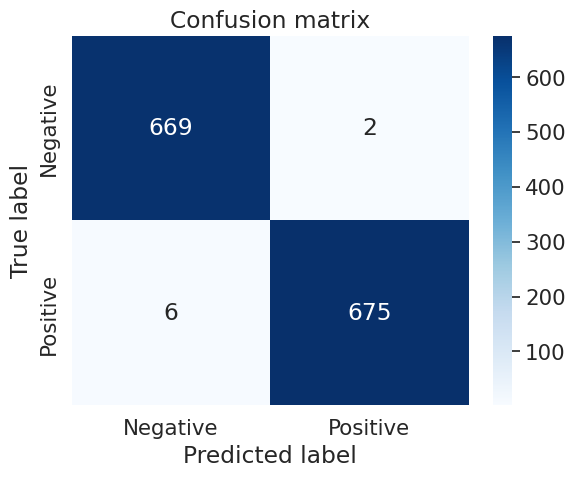

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In this case, the confusion matrix indicates that the model predicted 669 negative samples correctly (true negatives) and 675 positive samples correctly (true positives). It also predicted 6 positive samples incorrectly as negative (false negatives) and 2 negative samples incorrectly as positive (false positives).

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics

print("Evaluation Metrics:")
print("Accuracy:  {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall:    {:.2%}".format(recall))
print("F1-score:  {:.2%}".format(f1))

Evaluation Metrics:
Accuracy:  99.41%
Precision: 99.70%
Recall:    99.12%
F1-score:  99.41%


In [66]:
model1.save('lstm1.h5')


## LSTM Model with tuning

In [55]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

from keras.layers import Input, Embedding, LSTM, Dense, Dropout
from keras.models import Model
from keras import regularizers


# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Tokenize the text
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data['text'])

# Convert the text to sequences
maxlen = 100
X_train = tokenizer.texts_to_sequences(train_data['text'])
X_test = tokenizer.texts_to_sequences(test_data['text'])

# Pad the sequences
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Encode the target variable
y_train = train_data['class']
y_test = test_data['class']

# Define the LSTM model
inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(max_words, 100, input_length=maxlen)(inputs)
lstm_layer = LSTM(64, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=regularizers.l2(0.01))(embedding_layer)
dense_layer = Dense(1, activation='sigmoid')(lstm_layer)
model2 = Model(inputs=inputs, outputs=dense_layer)
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Train the model
history = model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f%%' % (accuracy*100))


Epoch 1/20
169/169 [==============================] - 39s 211ms/step - loss: 0.6644 - acc: 0.8829 - val_loss: 0.4268 - val_acc: 0.8572
Epoch 2/20
169/169 [==============================] - 31s 182ms/step - loss: 0.5021 - acc: 0.7911 - val_loss: 0.4601 - val_acc: 0.8499
Epoch 3/20
169/169 [==============================] - 38s 227ms/step - loss: 0.2550 - acc: 0.9302 - val_loss: 0.1008 - val_acc: 0.9845
Epoch 4/20
169/169 [==============================] - 30s 180ms/step - loss: 0.1531 - acc: 0.9678 - val_loss: 0.1040 - val_acc: 0.9815
Epoch 5/20
169/169 [==============================] - 32s 188ms/step - loss: 0.1444 - acc: 0.9684 - val_loss: 0.1153 - val_acc: 0.9749
Epoch 6/20
169/169 [==============================] - 32s 192ms/step - loss: 0.2004 - acc: 0.9426 - val_loss: 0.1554 - val_acc: 0.9608
Epoch 7/20
169/169 [==============================] - 33s 197ms/step - loss: 0.1191 - acc: 0.9752 - val_loss: 0.0707 - val_acc: 0.9882
Epoch 8/20
169/169 [==============================] - 3

In [64]:
# Make predictions on test data
y_pred = model2.predict(X_test)
y_pred = (y_pred > 0.5).astype(int) # convert probabilities to binary (0 or 1)

# Print confusion matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm2)

# Print evaluation metrics
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


43/43 [==============================] - 1s 23ms/step
Confusion Matrix:
[[667   4]
 [ 13 668]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       671
           1       0.99      0.98      0.99       681

    accuracy                           0.99      1352
   macro avg       0.99      0.99      0.99      1352
weighted avg       0.99      0.99      0.99      1352



In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics

print("Evaluation Metrics:")
print("Accuracy:  {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall:    {:.2%}".format(recall))
print("F1-score:  {:.2%}".format(f1))

Evaluation Metrics:
Accuracy:  98.74%
Precision: 99.40%
Recall:    98.09%
F1-score:  98.74%


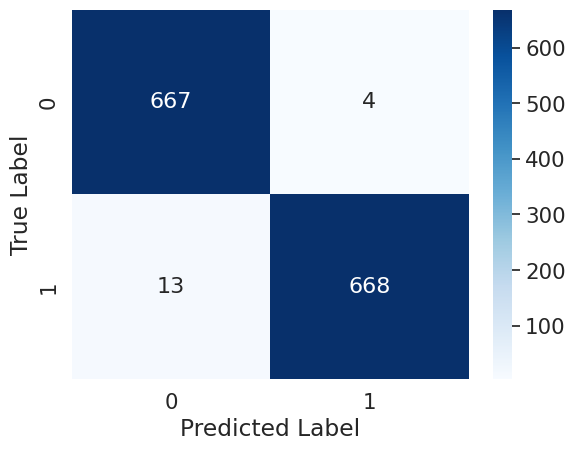

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.4)
sns.heatmap(cm2, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt='g')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In this case, the confusion matrix indicates that the model predicted 667 negative samples correctly (true negatives) and 668 positive samples correctly (true positives). It also predicted 13 positive samples incorrectly as negative (false negatives) and 4 negative samples incorrectly as positive (false positives).

In [69]:
model2.save('lstm2.h5')
